# Book Recommandation System

In [3]:
## Import Libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
books = pd.read_csv("Books.csv",low_memory = False)
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

In [5]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
books.duplicated().sum()

0

In [13]:
ratings.duplicated().sum()

0

In [14]:
users.duplicated().sum()

0

In [15]:
ratingsFrame =  pd.DataFrame(ratings)
ratingsFrame
# plt.figure(figsize = (10,7))
# plt.hist(booksFrame['Book-Rating'],bins = 70)    ### 5 aur bas 20 se kaam yaar
# plt.show()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


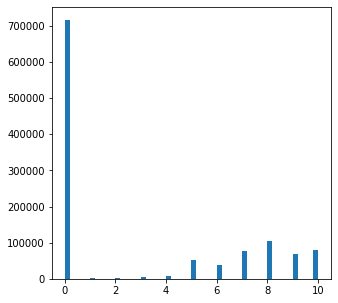

In [16]:
plt.figure(figsize = (5,5))
plt.hist(x = ratingsFrame['Book-Rating'], bins = 50, label = 'fwrw'  )    ### 5 aur bas 20 se kaam yaar
plt.show()

# POPULARITY BASED BOOK RECOMMENDATION


In [17]:
# RECOMMENDING MY BOOKS BASED ON THEIR POPULARITY . ONE NOTE IS THAT BOOKS SHOULD HAVE ATLEAST 250 VOTES


In [18]:
ratingBooks = ratings.merge(books, on = 'ISBN')

In [19]:
ratingBooks.shape

(1031136, 10)

In [20]:
ratingBooks.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [21]:
booksWithRatings = ratingBooks.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [22]:
booksWithRatings.rename(columns = {'Book-Rating' : 'Number of People Rated'},inplace = True)
booksWithRatings.sort_values(by = 'Number of People Rated',ascending = False)

,Book-Title,Number of People Rated
234951,Wild Animus,2502
196326,The Lovely Bones: A Novel,1295
183573,The Da Vinci Code,898
5303,A Painted House,838
199237,The Nanny Diaries: A Novel,828
...,...,...
147559,Real Love: The Truth About Finding Uncondition...,1
147558,Real Love: The Drawings for Sean,1
147557,"Real Love or Fake (Camfield Novel of Love, No 78)",1
63664,Fabulous Food for Family and Friends: Healthy ...,1


In [23]:
booksWithRatingsGreaterthan250 = booksWithRatings[booksWithRatings['Number of People Rated'] >= 250].sort_values(by = 'Number of People Rated')

In [24]:
booksWithAverage = ratingBooks.groupby('Book-Title').mean()['Book-Rating'].reset_index()
booksWithAverage

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [25]:
booksWithAverageAndCount = booksWithAverage.merge(booksWithRatingsGreaterthan250,on = 'Book-Title')
booksWithAverageAndCount

,Book-Title,Book-Rating,Number of People Rated
0,1984,4.454225,284
1,1st to Die: A Novel,3.575639,509
2,2nd Chance,3.269663,356
3,A Bend in the Road,3.364162,346
4,"A Child Called \It\"": One Child's Courage to S...",4.086792,265
...,...,...,...
181,White Oleander : A Novel,3.506460,387
182,White Oleander : A Novel (Oprah's Book Club),3.772472,356
183,Wicked: The Life and Times of the Wicked Witch...,3.766871,326
184,Wild Animus,1.019584,2502


In [26]:
booksWithAverageAndCount.sort_values('Book-Rating',ascending =False).head()

,Book-Title,Book-Rating,Number of People Rated
55,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
53,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
56,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
54,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
52,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556


In [27]:
booksWithAverageAndCount.merge(books, on='Book-Title').drop_duplicates('Book-Title').sort_values('Book-Rating',ascending =False).head(50)

,Book-Title,Book-Rating,Number of People Rated,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
226,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
220,Harry Potter and the Goblet of Fire (Book 4),5.824289,387,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
229,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
222,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
217,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
536,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
488,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
233,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
657,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
678,To Kill a Mockingbird,4.700000,510,0446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...


# COLLABORATIVE FILTERING METHOD TO RECOMMEND BOOKS

In [63]:
padalikha = ratingBooks.groupby('User-ID').count()['Book-Rating']>200
padaLikhaUserWith200Rating = padalikha[padalikha].index
padaLikhaUserWith200Rating = ratingBooks[ratingBooks['User-ID'].isin(padaLikhaUserWith200Rating)]
padaLikhaUserWith200Rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [70]:
BooksFrame = ratingBooks.groupby('Book-Title').count()['Book-Rating']>=50
booksWithAtleast50rating = BooksFrame[BooksFrame].index
booksWithAtleast50rating = ratingBooks[ratingBooks['Book-Title'].isin(booksWithAtleast50rating)]
booksWithAtleast50rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1029947,274061,1551663147,10,Fever,Elizabeth Lowell,1997,Mira,http://images.amazon.com/images/P/1551663147.0...,http://images.amazon.com/images/P/1551663147.0...,http://images.amazon.com/images/P/1551663147.0...
1030363,274808,0449701913,0,Homecoming,Cynthia Voigt,1983,Fawcett Books,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...
1030824,275970,0865714215,0,Stormy Weather,Guy Dauncey,2001,New Society Publishers,http://images.amazon.com/images/P/0865714215.0...,http://images.amazon.com/images/P/0865714215.0...,http://images.amazon.com/images/P/0865714215.0...
1030868,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...
